1. CART - Classification and Regression Tree Examples
CART Classification Accuracy: 0.9467
Feature 0: 0.1495
Feature 1: 0.1072
Feature 2: 0.0613
Feature 3: 0.6820

----------------------------------------
CART Regression MSE: 1133.9643
CART Regression R²: 0.9106

2. Decision Tree Algorithms Comparison
ID3-like (Entropy) Accuracy: 0.9778
C4.5-like (Entropy + Pruning) Accuracy: 1.0000
CART (Gini) Accuracy: 1.0000

3. Splitting Criteria Comparison
Sample Gini Impurity: 0.4800
Sample Entropy: 0.9710
Information Gain: 0.0133
Gini Criteria Accuracy: 1.0000
Entropy Criteria Accuracy: 0.9778

4. Decision Tree Regression Examples
Shallow Tree (max_depth=3) - MSE: 0.0526, R²: 0.8831
Deep Tree (max_depth=10) - MSE: 0.0004, R²: 0.9992
Pruned Tree (min_samples_leaf=5) - MSE: 0.0157, R²: 0.9652


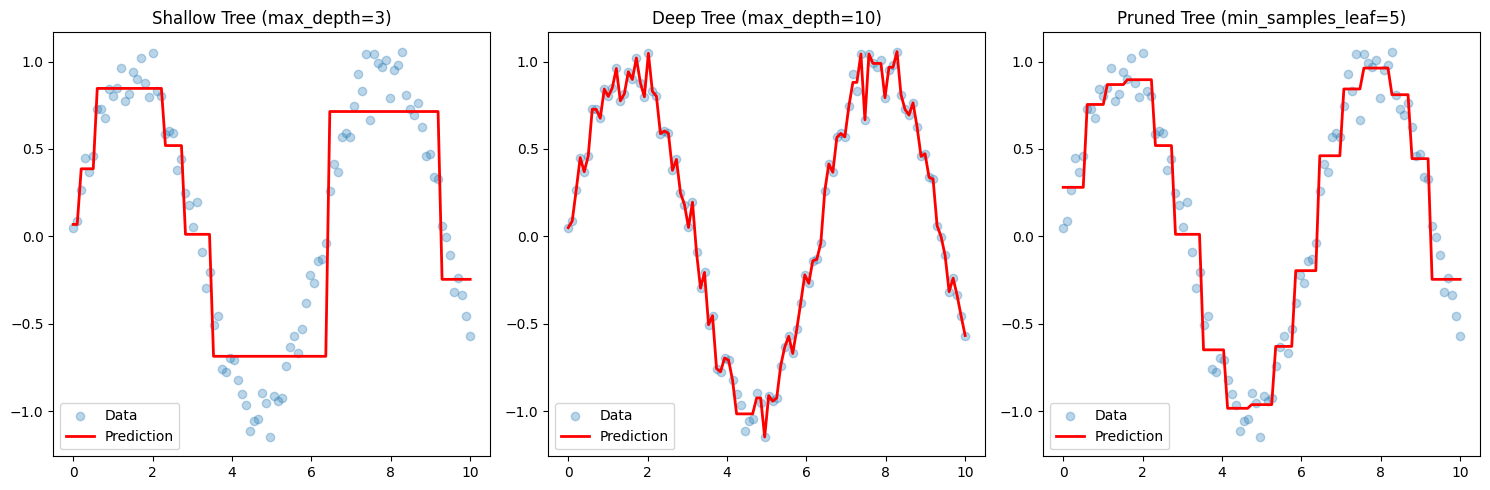


Diabetes Dataset Regression:
MSE: 3793.38
R²: 0.2973

5. Decision Tree Visualization
Decision Tree Rules (Text Format):
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2
...


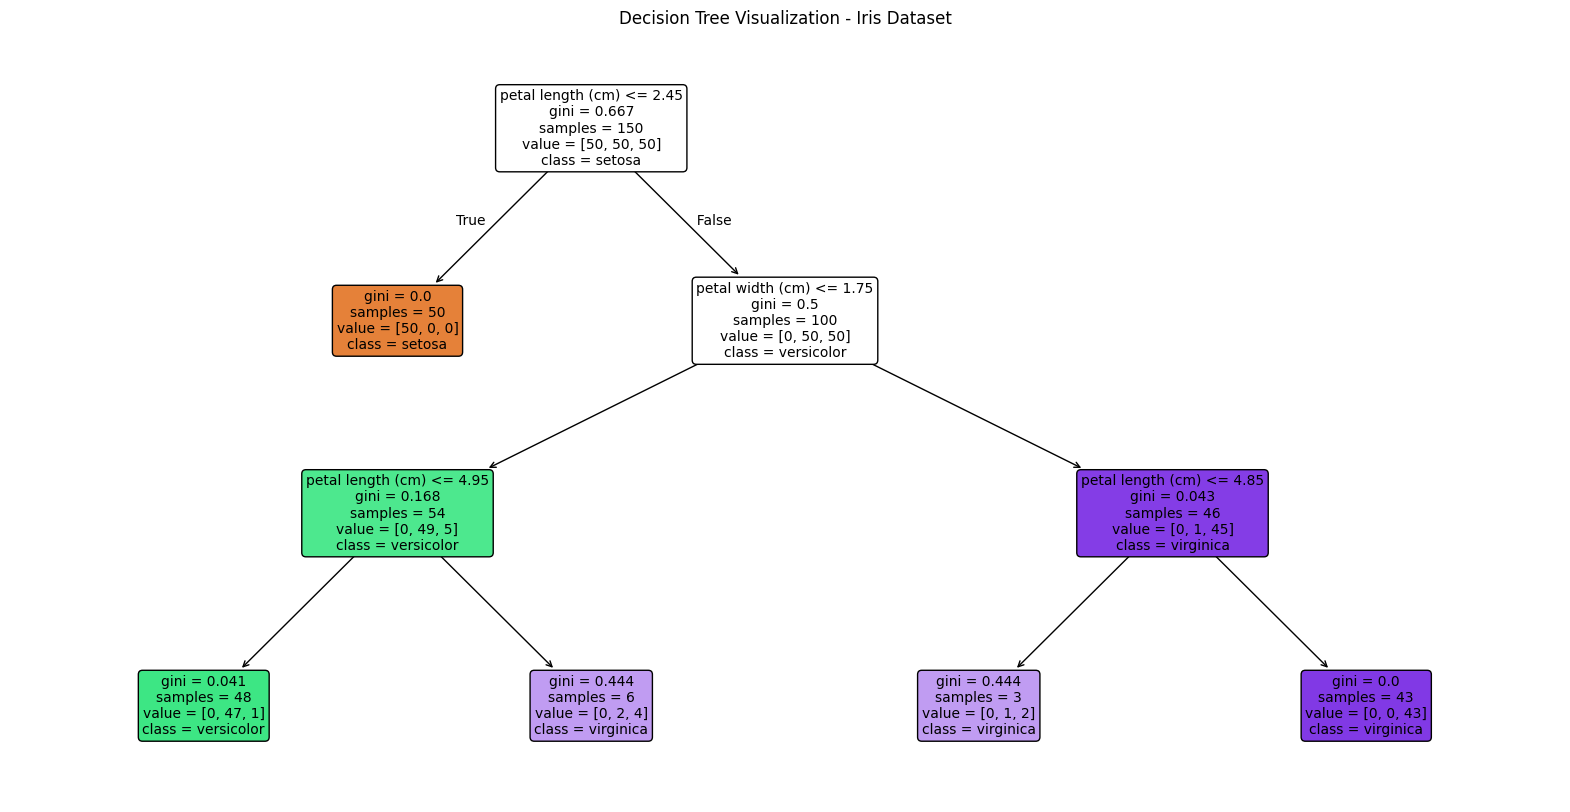


Graphviz DOT format generated (first 200 chars):
digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = ...


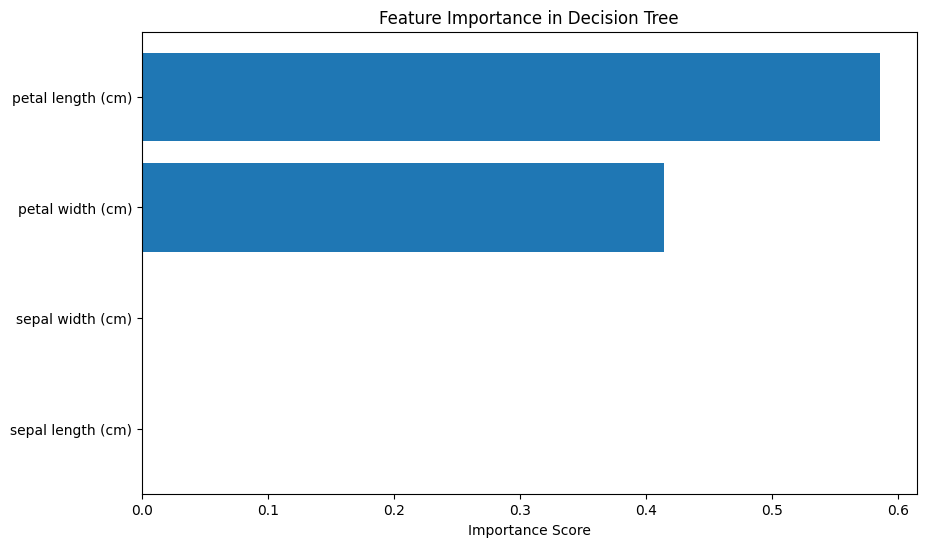


6. Regularization and Hyperparameter Tuning
Best parameters for classification:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validation score: 0.9429
Test accuracy with best parameters: 1.0000

Regularization Effects:
No Regularization: 0.9533 (+/- 0.0680)
Max Depth = 3: 0.9733 (+/- 0.0499)
Min Samples Split = 10: 0.9667 (+/- 0.0422)
Min Samples Leaf = 5: 0.9400 (+/- 0.1222)
Combined Regularization: 0.9600 (+/- 0.0499)

7. Project Examples - Sample Implementations
Project 1: Employee Attrition Prediction
----------------------------------------
HR Attrition Prediction Accuracy: 0.9000
Feature Importance for Attrition:
Age: 0.0297
MonthlyIncome: 0.2332
DistanceFromHome: 0.1539
YearsAtCompany: 0.2507
WorkLifeBalance: 0.1620
JobSatisfaction: 0.1705

Project 2: Restaurant Rating Prediction
----------------------------------------
Restaurant Rating Prediction MSE: 0.1779
Restaurant Rating Prediction R²: 0.6502

Project 3: Bank Marketing C

In [12]:
# Decision Trees - Complete Code Examples
# Module 5: Classification & Regression using Decision Trees

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression, load_iris, load_diabetes, fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import graphviz
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# 1. CART (Classification and Regression Tree) - Basic Implementation
# ============================================================================

print("=" * 60)
print("1. CART - Classification and Regression Tree Examples")
print("=" * 60)

# Generate sample classification data
X_class, y_class = make_classification(n_samples=1000, n_features=4, n_informative=3,
                                      n_redundant=1, n_clusters_per_class=1, random_state=42)

# Split the data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# CART Classification Tree
cart_classifier = DecisionTreeClassifier(criterion='gini', random_state=42)
cart_classifier.fit(X_train_c, y_train_c)

# Predictions
y_pred_c = cart_classifier.predict(X_test_c)
accuracy = accuracy_score(y_test_c, y_pred_c)
print(f"CART Classification Accuracy: {accuracy:.4f}")

# Feature importance
feature_names = [f'Feature_{i}' for i in range(X_class.shape[1])]
importance = cart_classifier.feature_importances_
for i, imp in enumerate(importance):
    print(f"Feature {i}: {imp:.4f}")

print("\n" + "-" * 40)

# Generate sample regression data
X_reg, y_reg = make_regression(n_samples=1000, n_features=4, noise=0.1, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# CART Regression Tree
cart_regressor = DecisionTreeRegressor(criterion='squared_error', random_state=42)
cart_regressor.fit(X_train_r, y_train_r)

# Predictions
y_pred_r = cart_regressor.predict(X_test_r)
mse = mean_squared_error(y_test_r, y_pred_r)
r2 = r2_score(y_test_r, y_pred_r)
print(f"CART Regression MSE: {mse:.4f}")
print(f"CART Regression R²: {r2:.4f}")

# ============================================================================
# 2. Decision Tree Learning Algorithms Comparison (ID3, C4.5, CART)
# ============================================================================

print("\n" + "=" * 60)
print("2. Decision Tree Algorithms Comparison")
print("=" * 60)

# Load Iris dataset for comparison
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42)

# ID3-like (using entropy)
id3_like = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_like.fit(X_train_iris, y_train_iris)
id3_accuracy = accuracy_score(y_test_iris, id3_like.predict(X_test_iris))

# C4.5-like (entropy with pruning)
c45_like = DecisionTreeClassifier(criterion='entropy', min_samples_split=5,
                                 min_samples_leaf=2, random_state=42)
c45_like.fit(X_train_iris, y_train_iris)
c45_accuracy = accuracy_score(y_test_iris, c45_like.predict(X_test_iris))

# CART (using gini)
cart_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
cart_gini.fit(X_train_iris, y_train_iris)
cart_accuracy = accuracy_score(y_test_iris, cart_gini.predict(X_test_iris))

print(f"ID3-like (Entropy) Accuracy: {id3_accuracy:.4f}")
print(f"C4.5-like (Entropy + Pruning) Accuracy: {c45_accuracy:.4f}")
print(f"CART (Gini) Accuracy: {cart_accuracy:.4f}")

# ============================================================================
# 3. Splitting Criteria: Gini Impurity, Entropy, Information Gain
# ============================================================================

print("\n" + "=" * 60)
print("3. Splitting Criteria Comparison")
print("=" * 60)

def calculate_gini_impurity(y):
    """Calculate Gini Impurity"""
    if len(y) == 0:
        return 0
    classes, counts = np.unique(y, return_counts=True)
    n_samples = len(y)
    gini = 1.0
    for count in counts:
        prob = count / n_samples
        gini -= prob ** 2
    return gini

def calculate_entropy(y):
    """Calculate Entropy"""
    if len(y) == 0:
        return 0
    classes, counts = np.unique(y, return_counts=True)
    n_samples = len(y)
    entropy = 0.0
    for count in counts:
        prob = count / n_samples
        if prob > 0:
            entropy -= prob * np.log2(prob)
    return entropy

def calculate_information_gain(parent, left_child, right_child):
    """Calculate Information Gain"""
    n_parent = len(parent)
    n_left = len(left_child)
    n_right = len(right_child)

    if n_parent == 0:
        return 0

    parent_gini = calculate_gini_impurity(parent) # Using Gini for this example
    weighted_gini = (n_left/n_parent) * calculate_gini_impurity(left_child) + \
                   (n_right/n_parent) * calculate_gini_impurity(right_child)

    return parent_gini - weighted_gini

# Example calculations
sample_labels = np.array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1])
left_split = np.array([0, 0, 1, 1])
right_split = np.array([1, 0, 1, 0, 1, 1])

print(f"Sample Gini Impurity: {calculate_gini_impurity(sample_labels):.4f}")
print(f"Sample Entropy: {calculate_entropy(sample_labels):.4f}")
print(f"Information Gain: {calculate_information_gain(sample_labels, left_split, right_split):.4f}")

# Compare different criteria
criteria_comparison = {}
for criterion in ['gini', 'entropy']:
    dt = DecisionTreeClassifier(criterion=criterion, random_state=42)
    dt.fit(X_train_iris, y_train_iris)
    score = accuracy_score(y_test_iris, dt.predict(X_test_iris))
    criteria_comparison[criterion] = score
    print(f"{criterion.capitalize()} Criteria Accuracy: {score:.4f}")

# ============================================================================
# 4. Decision Tree Regression
# ============================================================================

print("\n" + "=" * 60)
print("4. Decision Tree Regression Examples")
print("=" * 60)

# Create regression dataset
np.random.seed(42)
X_reg_demo = np.linspace(0, 10, 100).reshape(-1, 1)
y_reg_demo = np.sin(X_reg_demo).ravel() + np.random.normal(0, 0.1, X_reg_demo.shape[0])

# Different regression tree configurations
regression_trees = {
    'Shallow Tree (max_depth=3)': DecisionTreeRegressor(max_depth=3, random_state=42),
    'Deep Tree (max_depth=10)': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Pruned Tree (min_samples_leaf=5)': DecisionTreeRegressor(min_samples_leaf=5, random_state=42)
}

plt.figure(figsize=(15, 5))
for i, (name, regressor) in enumerate(regression_trees.items(), 1):
    regressor.fit(X_reg_demo, y_reg_demo)
    y_pred_demo = regressor.predict(X_reg_demo)

    plt.subplot(1, 3, i)
    plt.scatter(X_reg_demo, y_reg_demo, alpha=0.3, label='Data')
    plt.plot(X_reg_demo, y_pred_demo, 'r-', linewidth=2, label='Prediction')
    plt.title(name)
    plt.legend()

    mse = mean_squared_error(y_reg_demo, y_pred_demo)
    r2 = r2_score(y_reg_demo, y_pred_demo)
    print(f"{name} - MSE: {mse:.4f}, R²: {r2:.4f}")

plt.tight_layout()
plt.show()

# Multi-feature regression example
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X_diabetes, y_diabetes = diabetes.data, diabetes.target
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_diabetes, y_diabetes, test_size=0.3, random_state=42)

dt_regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)
dt_regressor.fit(X_train_d, y_train_d)
y_pred_d = dt_regressor.predict(X_test_d)

print(f"\nDiabetes Dataset Regression:")
print(f"MSE: {mean_squared_error(y_test_d, y_pred_d):.2f}")
print(f"R²: {r2_score(y_test_d, y_pred_d):.4f}")

# ============================================================================
# 5. Visualizing Decision Trees
# ============================================================================

print("\n" + "=" * 60)
print("5. Decision Tree Visualization")
print("=" * 60)

# Simple tree for visualization
simple_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
simple_tree.fit(X_iris, y_iris)

# Text representation
from sklearn.tree import export_text
tree_rules = export_text(simple_tree, feature_names=iris.feature_names)
print("Decision Tree Rules (Text Format):")
print(tree_rules[:500] + "...")  # Show first 500 characters

# Matplotlib visualization
plt.figure(figsize=(20, 10))
plot_tree(simple_tree,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization - Iris Dataset")
plt.show()

# Graphviz DOT format (for external rendering)
dot_data = export_graphviz(simple_tree,
                          feature_names=iris.feature_names,
                          class_names=iris.target_names,
                          filled=True,
                          rounded=True)

print("\nGraphviz DOT format generated (first 200 chars):")
print(dot_data[:200] + "...")

# Feature importance visualization
plt.figure(figsize=(10, 6))
feature_importance = simple_tree.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(iris.feature_names)[sorted_idx])
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Importance Score')
plt.show()

# ============================================================================
# 6. Regularization and Hyperparameter Tuning
# ============================================================================

print("\n" + "=" * 60)
print("6. Regularization and Hyperparameter Tuning")
print("=" * 60)

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV for classification
dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_iris, y_train_iris)

print("Best parameters for classification:")
print(grid_search.best_params_)
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Test the best model
best_classifier = grid_search.best_estimator_
test_accuracy = accuracy_score(y_test_iris, best_classifier.predict(X_test_iris))
print(f"Test accuracy with best parameters: {test_accuracy:.4f}")

# Regularization comparison
regularization_params = [
    {'name': 'No Regularization', 'params': {}},
    {'name': 'Max Depth = 3', 'params': {'max_depth': 3}},
    {'name': 'Min Samples Split = 10', 'params': {'min_samples_split': 10}},
    {'name': 'Min Samples Leaf = 5', 'params': {'min_samples_leaf': 5}},
    {'name': 'Combined Regularization', 'params': {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 3}}
]

print("\nRegularization Effects:")
for reg in regularization_params:
    dt = DecisionTreeClassifier(random_state=42, **reg['params'])
    scores = cross_val_score(dt, X_iris, y_iris, cv=5)
    print(f"{reg['name']}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# ============================================================================
# 7. Project Examples with Real Datasets
# ============================================================================

print("\n" + "=" * 60)
print("7. Project Examples - Sample Implementations")
print("=" * 60)

# Project 1: Employee Attrition Prediction (Simulated Data)
print("Project 1: Employee Attrition Prediction")
print("-" * 40)

# Create simulated HR data
np.random.seed(42)
n_employees = 1000

hr_data = pd.DataFrame({
    'Age': np.random.randint(22, 60, n_employees),
    'MonthlyIncome': np.random.randint(1000, 10000, n_employees),
    'DistanceFromHome': np.random.randint(1, 30, n_employees),
    'YearsAtCompany': np.random.randint(0, 20, n_employees),
    'WorkLifeBalance': np.random.randint(1, 5, n_employees),
    'JobSatisfaction': np.random.randint(1, 5, n_employees)
})

# Create target variable (attrition) based on features
attrition_prob = (
    (hr_data['Age'] < 30).astype(int) * 0.3 +
    (hr_data['MonthlyIncome'] < 3000).astype(int) * 0.4 +
    (hr_data['DistanceFromHome'] > 20).astype(int) * 0.2 +
    (hr_data['WorkLifeBalance'] < 3).astype(int) * 0.3 +
    (hr_data['JobSatisfaction'] < 3).astype(int) * 0.4
)
hr_data['Attrition'] = (np.random.random(n_employees) < (attrition_prob / 5)).astype(int)

# Train decision tree for attrition prediction
X_hr = hr_data.drop('Attrition', axis=1)
y_hr = hr_data['Attrition']
X_train_hr, X_test_hr, y_train_hr, y_test_hr = train_test_split(X_hr, y_hr, test_size=0.3, random_state=42)

# Hyperparameter tuning for HR data
hr_param_grid = {
    'max_depth': [5, 7, 10],
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20]
}

hr_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                             hr_param_grid, cv=5, scoring='accuracy')
hr_grid_search.fit(X_train_hr, y_train_hr)

hr_predictions = hr_grid_search.best_estimator_.predict(X_test_hr)
hr_accuracy = accuracy_score(y_test_hr, hr_predictions)

print(f"HR Attrition Prediction Accuracy: {hr_accuracy:.4f}")
print("Feature Importance for Attrition:")
for feature, importance in zip(X_hr.columns, hr_grid_search.best_estimator_.feature_importances_):
    print(f"{feature}: {importance:.4f}")

# Project 2: Restaurant Rating Prediction (Simulated Data)
print("\nProject 2: Restaurant Rating Prediction")
print("-" * 40)

# Create simulated restaurant data
restaurant_data = pd.DataFrame({
    'AverageCost': np.random.randint(100, 2000, 500),
    'BookingRequired': np.random.randint(0, 2, 500),
    'OnlineDelivery': np.random.randint(0, 2, 500),
    'PriceRange': np.random.randint(1, 5, 500),
    'LocationRating': np.random.uniform(1, 5, 500)
})

# Create rating based on features
rating = (
    restaurant_data['AverageCost'] / 400 +
    restaurant_data['LocationRating'] +
    restaurant_data['OnlineDelivery'] * 0.5 +
    np.random.normal(0, 0.5, 500)
)
restaurant_data['Rating'] = np.clip(rating, 1, 5)

# Regression tree for rating prediction
X_rest = restaurant_data.drop('Rating', axis=1)
y_rest = restaurant_data['Rating']
X_train_rest, X_test_rest, y_train_rest, y_test_rest = train_test_split(
    X_rest, y_rest, test_size=0.3, random_state=42)

rest_regressor = DecisionTreeRegressor(max_depth=7, min_samples_split=10, random_state=42)
rest_regressor.fit(X_train_rest, y_train_rest)
rest_predictions = rest_regressor.predict(X_test_rest)

rest_mse = mean_squared_error(y_test_rest, rest_predictions)
rest_r2 = r2_score(y_test_rest, rest_predictions)

print(f"Restaurant Rating Prediction MSE: {rest_mse:.4f}")
print(f"Restaurant Rating Prediction R²: {rest_r2:.4f}")

# Project 3: Bank Marketing Analysis (Simulated Data)
print("\nProject 3: Bank Marketing Campaign Success")
print("-" * 40)

# Create simulated bank marketing data
bank_data = pd.DataFrame({
    'Age': np.random.randint(18, 80, 800),
    'Balance': np.random.randint(-5000, 50000, 800),
    'Duration': np.random.randint(0, 1000, 800),
    'Campaign': np.random.randint(1, 10, 800),
    'Previous': np.random.randint(0, 5, 800),
    'Education': np.random.randint(1, 4, 800)  # 1=primary, 2=secondary, 3=tertiary
})

# Create target based on realistic banking patterns
success_prob = (
    (bank_data['Balance'] > 10000).astype(int) * 0.4 +
    (bank_data['Duration'] > 300).astype(int) * 0.3 +
    (bank_data['Education'] == 3).astype(int) * 0.2 +
    (bank_data['Campaign'] < 3).astype(int) * 0.3
)
bank_data['Success'] = (np.random.random(800) < (success_prob / 4)).astype(int)

X_bank = bank_data.drop('Success', axis=1)
y_bank = bank_data['Success']
X_train_bank, X_test_bank, y_train_bank, y_test_bank = train_test_split(
    X_bank, y_bank, test_size=0.3, random_state=42)

# Train and evaluate bank marketing model
bank_tree = DecisionTreeClassifier(max_depth=6, min_samples_split=20, random_state=42)
bank_tree.fit(X_train_bank, y_train_bank)
bank_predictions = bank_tree.predict(X_test_bank)

bank_accuracy = accuracy_score(y_test_bank, bank_predictions)
print(f"Bank Marketing Success Prediction Accuracy: {bank_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_bank, bank_predictions))

# Project 4: FIFA Player Overall Rating Prediction (Simulated Data)
print("\nProject 4: FIFA Player Rating Prediction")
print("-" * 40)

# Create simulated FIFA player data
fifa_data = pd.DataFrame({
    'Pace': np.random.randint(30, 100, 600),
    'Shooting': np.random.randint(20, 100, 600),
    'Passing': np.random.randint(20, 100, 600),
    'Dribbling': np.random.randint(20, 100, 600),
    'Defending': np.random.randint(10, 100, 600),
    'Physical': np.random.randint(30, 100, 600),
    'Age': np.random.randint(16, 40, 600)
})

# Create overall rating based on skills
fifa_data['Overall'] = (
    fifa_data['Pace'] * 0.15 +
    fifa_data['Shooting'] * 0.2 +
    fifa_data['Passing'] * 0.2 +
    fifa_data['Dribbling'] * 0.15 +
    fifa_data['Defending'] * 0.15 +
    fifa_data['Physical'] * 0.15 +
    np.random.normal(0, 3, 600)
).astype(int)

fifa_data['Overall'] = np.clip(fifa_data['Overall'], 40, 99)

X_fifa = fifa_data.drop('Overall', axis=1)
y_fifa = fifa_data['Overall']
X_train_fifa, X_test_fifa, y_train_fifa, y_test_fifa = train_test_split(
    X_fifa, y_fifa, test_size=0.3, random_state=42)

# Hyperparameter tuning for FIFA data
fifa_param_grid = {
    'max_depth': [5, 8, 12],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 5, 10]
}

fifa_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42),
                               fifa_param_grid, cv=5, scoring='r2')
fifa_grid_search.fit(X_train_fifa, y_train_fifa)

fifa_predictions = fifa_grid_search.best_estimator_.predict(X_test_fifa)
fifa_mse = mean_squared_error(y_test_fifa, fifa_predictions)
fifa_r2 = r2_score(y_test_fifa, fifa_predictions)

print(f"FIFA Player Rating Prediction MSE: {fifa_mse:.2f}")
print(f"FIFA Player Rating Prediction R²: {fifa_r2:.4f}")
print(f"Best parameters: {fifa_grid_search.best_params_}")

# ============================================================================
# 8. Advanced Decision Tree Techniques
# ============================================================================

print("\n" + "=" * 60)
print("8. Advanced Decision Tree Techniques")
print("=" * 60)

# Cost-complexity pruning (post-pruning)
def cost_complexity_pruning_demo():
    # Generate more complex dataset
    X_complex, y_complex = make_classification(n_samples=1000, n_features=10,
                                             n_informative=5, n_redundant=2,
                                             random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_complex, y_complex,
                                                       test_size=0.3, random_state=42)

    # Find optimal alpha for pruning
    dt = DecisionTreeClassifier(random_state=42)
    path = dt.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities

    # Train trees with different alpha values
    dt_models = []
    for ccp_alpha in ccp_alphas:
        dt_model = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
        dt_model.fit(X_train, y_train)
        dt_models.append(dt_model)

    # Evaluate models
    train_scores = [accuracy_score(y_train, dt.predict(X_train)) for dt in dt_models]
    test_scores = [accuracy_score(y_test, dt.predict(X_test)) for dt in dt_models]

    # Find best alpha
    best_alpha_idx = np.argmax(test_scores)
    best_alpha = ccp_alphas[best_alpha_idx]

    print(f"Optimal pruning alpha: {best_alpha:.6f}")
    print(f"Best test accuracy: {test_scores[best_alpha_idx]:.4f}")

    return dt_models[best_alpha_idx]

pruned_tree = cost_complexity_pruning_demo()

# Handling missing values in decision trees
def missing_values_demo():
    # Create dataset with missing values
    X_missing = np.random.randn(500, 4)
    y_missing = (X_missing[:, 0] + X_missing[:, 1] > 0).astype(int)

    # Introduce missing values
    missing_mask = np.random.random((500, 4)) < 0.1
    X_missing[missing_mask] = np.nan

    # Decision trees handle missing values by finding best surrogate splits
    # or by treating missing as a separate category
    dt_missing = DecisionTreeClassifier(random_state=42)

    # For demonstration, we'll use simple imputation
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X_missing)

    dt_missing.fit(X_imputed, y_missing)

    print(f"Decision tree with imputed missing values trained successfully")
    print(f"Tree depth: {dt_missing.get_depth()}")
    print(f"Number of leaves: {dt_missing.get_n_leaves()}")

missing_values_demo()

# Feature selection using decision trees
def feature_selection_demo():
    # Generate dataset with many features
    X_many_features, y_features = make_classification(n_samples=1000, n_features=20,
                                                     n_informative=5, n_redundant=5,
                                                     random_state=42)

    # Train decision tree and get feature importances
    dt_selector = DecisionTreeClassifier(random_state=42)
    dt_selector.fit(X_many_features, y_features)

    # Select top features
    feature_importance = dt_selector.feature_importances_
    top_features_idx = np.argsort(feature_importance)[-5:]  # Top 5 features

    print("Feature Selection Results:")
    print(f"Original features: {X_many_features.shape[1]}")
    print(f"Selected features: {len(top_features_idx)}")
    print(f"Top feature indices: {top_features_idx}")
    print(f"Top feature importances: {feature_importance[top_features_idx]}")

    # Train model with selected features
    X_selected = X_many_features[:, top_features_idx]
    X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
        X_selected, y_features, test_size=0.3, random_state=42)

    dt_reduced = DecisionTreeClassifier(random_state=42)
    dt_reduced.fit(X_train_sel, y_train_sel)
    reduced_accuracy = accuracy_score(y_test_sel, dt_reduced.predict(X_test_sel))

    print(f"Accuracy with selected features: {reduced_accuracy:.4f}")

feature_selection_demo()

# ============================================================================
# 9. Performance Analysis and Model Comparison
# ============================================================================

print("\n" + "=" * 60)
print("9. Performance Analysis and Model Comparison")
print("=" * 60)

# Learning curves to analyze overfitting
from sklearn.model_selection import learning_curve

def plot_learning_curves():
    # Generate complex dataset
    X_curve, y_curve = make_classification(n_samples=2000, n_features=10,
                                          n_informative=8, random_state=42)

    # Different tree configurations
    models = {
        'Overfitted Tree': DecisionTreeClassifier(random_state=42),
        'Regularized Tree': DecisionTreeClassifier(max_depth=5, min_samples_split=20,
                                                 min_samples_leaf=10, random_state=42),
        'Pruned Tree': DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)
    }

    for name, model in models.items():
        train_sizes, train_scores, val_scores = learning_curve(
            model, X_curve, y_curve, cv=5, n_jobs=-1,
            train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)

        print(f"\n{name} Performance:")
        print(f"Final Training Score: {train_mean[-1]:.4f} (+/- {train_std[-1]:.4f})")
        print(f"Final Validation Score: {val_mean[-1]:.4f} (+/- {val_std[-1]:.4f})")
        print(f"Overfitting Gap: {train_mean[-1] - val_mean[-1]:.4f}")

plot_learning_curves()

# Validation curves for hyperparameter analysis
from sklearn.model_selection import validation_curve

def hyperparameter_validation():
    X_val, y_val = make_classification(n_samples=1000, n_features=8, random_state=42)

    # Max depth validation
    max_depths = range(1, 21)
    train_scores, val_scores = validation_curve(
        DecisionTreeClassifier(random_state=42), X_val, y_val,
        param_name='max_depth', param_range=max_depths, cv=5)

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    optimal_depth = max_depths[np.argmax(val_mean)]

    print(f"\nHyperparameter Validation Results:")
    print(f"Optimal max_depth: {optimal_depth}")
    print(f"Best validation score: {val_mean[optimal_depth-1]:.4f}")

    # Min samples split validation
    min_samples_splits = range(2, 51, 5)
    train_scores_split, val_scores_split = validation_curve(
        DecisionTreeClassifier(random_state=42), X_val, y_val,
        param_name='min_samples_split', param_range=min_samples_splits, cv=5)

    val_mean_split = np.mean(val_scores_split, axis=1)
    optimal_split = min_samples_splits[np.argmax(val_mean_split)]

    print(f"Optimal min_samples_split: {optimal_split}")
    print(f"Best validation score: {np.max(val_mean_split):.4f}")

hyperparameter_validation()

# ============================================================================
# 10. Ensemble Methods Preview (Tree-based)
# ============================================================================

print("\n" + "=" * 60)
print("10. Ensemble Methods with Decision Trees")
print("=" * 60)

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

# Compare single tree vs ensemble methods
def ensemble_comparison():
    X_ens, y_ens = make_classification(n_samples=1000, n_features=10,
                                      n_informative=8, random_state=42)
    X_train_ens, X_test_ens, y_train_ens, y_test_ens = train_test_split(
        X_ens, y_ens, test_size=0.3, random_state=42)

    # Different ensemble methods
    models = {
        'Single Decision Tree': DecisionTreeClassifier(random_state=42),
        'Bagging (10 trees)': BaggingClassifier(DecisionTreeClassifier(),
                                               n_estimators=10, random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42),
        'Extra Trees': ExtraTreesClassifier(n_estimators=10, random_state=42),
        'AdaBoost': AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                      n_estimators=10, random_state=42)
    }

    print("Ensemble Methods Comparison:")
    for name, model in models.items():
        # Cross-validation scores
        cv_scores = cross_val_score(model, X_train_ens, y_train_ens, cv=5)

        # Test performance
        model.fit(X_train_ens, y_train_ens)
        test_score = accuracy_score(y_test_ens, model.predict(X_test_ens))

        print(f"{name:20} - CV: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f}) | Test: {test_score:.4f}")

ensemble_comparison()

# ============================================================================
# 11. Real-time Prediction System
# ============================================================================

print("\n" + "=" * 60)
print("11. Real-time Prediction System Example")
print("=" * 60)

class DecisionTreePredictor:
    """A class for real-time predictions using decision trees"""

    def __init__(self):
        self.model = None
        self.feature_names = None
        self.is_trained = False

    def train(self, X, y, feature_names=None, **kwargs):
        """Train the decision tree model"""
        self.model = DecisionTreeClassifier(random_state=42, **kwargs)
        self.model.fit(X, y)
        self.feature_names = feature_names or [f'feature_{i}' for i in range(X.shape[1])]
        self.is_trained = True
        print(f"Model trained successfully with {X.shape[0]} samples and {X.shape[1]} features")

    def predict_single(self, sample):
        """Make prediction for a single sample"""
        if not self.is_trained:
            raise ValueError("Model must be trained first")

        sample_array = np.array(sample).reshape(1, -1)
        prediction = self.model.predict(sample_array)[0]
        probability = self.model.predict_proba(sample_array)[0]

        return {
            'prediction': prediction,
            'probability': probability,
            'confidence': np.max(probability)
        }

    def predict_batch(self, samples):
        """Make predictions for multiple samples"""
        if not self.is_trained:
            raise ValueError("Model must be trained first")

        predictions = self.model.predict(samples)
        probabilities = self.model.predict_proba(samples)

        return {
            'predictions': predictions,
            'probabilities': probabilities,
            'confidences': np.max(probabilities, axis=1)
        }

    def get_feature_importance(self):
        """Get feature importance scores"""
        if not self.is_trained:
            raise ValueError("Model must be trained first")

        importance_dict = {}
        for name, importance in zip(self.feature_names, self.model.feature_importances_):
            importance_dict[name] = importance

        return sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

    def explain_prediction(self, sample):
        """Explain a single prediction using decision path"""
        if not self.is_trained:
            raise ValueError("Model must be trained first")

        sample_array = np.array(sample).reshape(1, -1)

        # Get decision path
        leaf_id = self.model.decision_path(sample_array)
        feature_ids = self.model.tree_.feature
        threshold = self.model.tree_.threshold

        print(f"\nDecision Path Explanation:")
        print("-" * 30)

        for node_id in leaf_id.indices:
            if sample_array[0, feature_ids[node_id]] <= threshold[node_id]:
                threshold_sign = "<="
            else:
                threshold_sign = ">"

            if feature_ids[node_id] != -2:  # Not a leaf node
                feature_name = self.feature_names[feature_ids[node_id]]
                print(f"Node {node_id}: {feature_name} {threshold_sign} {threshold[node_id]:.2f}")

# Demonstrate real-time prediction system
print("Real-time Prediction System Demo:")

# Create and train predictor
predictor = DecisionTreePredictor()

# Generate sample data
X_demo, y_demo = make_classification(n_samples=500, n_features=5,
                                    n_informative=3, random_state=42)
feature_names = ['Income', 'Age', 'Credit_Score', 'Debt_Ratio', 'Loan_Amount']

predictor.train(X_demo, y_demo, feature_names, max_depth=5, min_samples_split=10)

# Single prediction
sample_customer = [45000, 35, 720, 0.3, 10000]  # Income, Age, Credit Score, Debt Ratio, Loan Amount
result = predictor.predict_single(sample_customer)

print(f"\nSingle Customer Prediction:")
print(f"Customer Profile: Income=${sample_customer[0]}, Age={sample_customer[1]}, "
      f"Credit Score={sample_customer[2]}, Debt Ratio={sample_customer[3]}, Loan Amount=${sample_customer[4]}")
print(f"Prediction: {result['prediction']}")
print(f"Confidence: {result['confidence']:.4f}")

# Explain the prediction
predictor.explain_prediction(sample_customer)

# Feature importance
print(f"\nFeature Importance Ranking:")
for feature, importance in predictor.get_feature_importance():
    print(f"{feature}: {importance:.4f}")

# Batch prediction
batch_samples = np.random.randn(5, 5) * 1000 + [40000, 30, 700, 0.25, 8000]
batch_results = predictor.predict_batch(batch_samples)

print(f"\nBatch Predictions:")
for i, (pred, conf) in enumerate(zip(batch_results['predictions'],
                                   batch_results['confidences'])):
    print(f"Sample {i+1}: Prediction={pred}, Confidence={conf:.4f}")

# ============================================================================
# 12. Custom Decision Tree Implementation (Educational)
# ============================================================================

print("\n" + "=" * 60)
print("12. Custom Decision Tree Implementation")
print("=" * 60)

class SimpleDecisionTree:
    """A simple decision tree implementation for educational purposes"""

    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def gini_impurity(self, y):
        """Calculate Gini impurity"""
        if len(y) == 0:
            return 0
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        gini = 1 - np.sum(probabilities ** 2)
        return gini

    def information_gain(self, parent, left_child, right_child):
        """Calculate information gain"""
        n_parent = len(parent)
        n_left = len(left_child)
        n_right = len(right_child)

        if n_parent == 0:
            return 0

        parent_gini = self.gini_impurity(parent) # Using Gini for this example
        weighted_gini = (n_left/n_parent) * self.gini_impurity(left_child) + \
                       (n_right/n_parent) * self.gini_impurity(right_child)

        return parent_gini - weighted_gini

    def find_best_split(self, X, y):
        """Find the best feature and threshold to split on"""
        best_gain = 0
        best_feature = None
        best_threshold = None

        n_features = X.shape[1]

        for feature_idx in range(n_features):
            feature_values = X[:, feature_idx]
            thresholds = np.unique(feature_values)

            for threshold in thresholds:
                left_mask = feature_values <= threshold
                right_mask = ~left_mask

                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                left_y = y[left_mask]
                right_y = y[right_mask]

                gain = self.information_gain(y, left_y, right_y)

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_idx
                    best_threshold = threshold

        return best_feature, best_threshold, best_gain

    def build_tree(self, X, y, depth=0):
        """Recursively build the decision tree"""
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        # Stopping criteria
        if (depth >= self.max_depth or
            n_samples < self.min_samples_split or
            n_classes == 1):
            # Create leaf node
            most_common_class = np.bincount(y).argmax()
            return {'class': most_common_class, 'samples': n_samples}

        # Find best split
        best_feature, best_threshold, best_gain = self.find_best_split(X, y)

        if best_feature is None or best_gain == 0:
            # Create leaf node if no good split found
            most_common_class = np.bincount(y).argmax()
            return {'class': most_common_class, 'samples': n_samples}

        # Split the data
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask

        # Recursively build left and right subtrees
        left_subtree = self.build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self.build_tree(X[right_mask], y[right_mask], depth + 1)

        return {
            'feature': best_feature,
            'threshold': best_threshold,
            'left': left_subtree,
            'right': right_subtree,
            'samples': n_samples
        }

    def fit(self, X, y):
        """Train the decision tree"""
        self.tree = self.build_tree(X, y)

    def predict_sample(self, sample, tree=None):
        """Predict class for a single sample"""
        if tree is None:
            tree = self.tree

        # If leaf node, return class
        if 'class' in tree:
            return tree['class']

        # Navigate tree based on feature value
        if sample[tree['feature']] <= tree['threshold']:
            return self.predict_sample(sample, tree['left'])
        else:
            return self.predict_sample(sample, tree['right'])

    def predict(self, X):
        """Predict classes for multiple samples"""
        predictions = []
        for sample in X:
            predictions.append(self.predict_sample(sample))
        return np.array(predictions)

    def print_tree(self, tree=None, depth=0):
        """Print the tree structure"""
        if tree is None:
            tree = self.tree

        indent = "  " * depth

        if 'class' in tree:
            print(f"{indent}Predict: Class {tree['class']} (samples: {tree['samples']})")
        else:
            print(f"{indent}Feature {tree['feature']} <= {tree['threshold']:.2f} (samples: {tree['samples']})")
            print(f"{indent}├─ True:")
            self.print_tree(tree['left'], depth + 1)
            print(f"{indent}└─ False:")
            self.print_tree(tree['right'], depth + 1)

# Demonstrate custom decision tree
print("Custom Decision Tree Demo:")

# Generate simple dataset
X_custom, y_custom = make_classification(n_samples=100, n_features=2,
                                        n_redundant=0, n_informative=2,
                                        n_clusters_per_class=1, random_state=42)

X_train_custom, X_test_custom, y_train_custom, y_test_custom = train_test_split(
    X_custom, y_custom, test_size=0.3, random_state=42)

# Train custom tree
custom_tree = SimpleDecisionTree(max_depth=3, min_samples_split=5)
custom_tree.fit(X_train_custom, y_train_custom)

# Make predictions
custom_predictions = custom_tree.predict(X_test_custom)
custom_accuracy = accuracy_score(y_test_custom, custom_predictions)

print(f"Custom Decision Tree Accuracy: {custom_accuracy:.4f}")

print("\nTree Structure:")
custom_tree.print_tree()

# Compare with sklearn
sklearn_tree = DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=42)
sklearn_tree.fit(X_train_custom, y_train_custom)
sklearn_predictions = sklearn_tree.predict(X_test_custom)
sklearn_accuracy = accuracy_score(y_test_custom, sklearn_predictions)

print(f"\nComparison with Scikit-learn:")
print(f"Custom Implementation: {custom_accuracy:.4f}")
print(f"Scikit-learn: {sklearn_accuracy:.4f}")

# ============================================================================
# 13. Decision Trees for Different Data Types
# ============================================================================

print("\n" + "=" * 60)
print("13. Decision Trees for Different Data Types")
print("=" * 60)

# Handling categorical features
def categorical_features_demo():
    # Create dataset with categorical features
    np.random.seed(42)
    n_samples = 500

    # Categorical features
    categories = {
        'Color': ['Red', 'Blue', 'Green', 'Yellow'],
        'Size': ['Small', 'Medium', 'Large'],
        'Material': ['Wood', 'Metal', 'Plastic']
    }

    data = {}
    for feature, values in categories.items():
        data[feature] = np.random.choice(values, n_samples)

    # Add numerical features
    data['Price'] = np.random.uniform(10, 100, n_samples)
    data['Weight'] = np.random.uniform(0.1, 5.0, n_samples)

    # Create target based on features
    target = ((data['Price'] > 50) & (data['Weight'] > 2.5)).astype(int)

    # Convert to DataFrame
    df = pd.DataFrame(data)
    df['Target'] = target

    print("Categorical Features Demo:")
    print(f"Dataset shape: {df.shape}")
    print(f"Categorical features: {list(categories.keys())}")
    print(f"Target distribution: {np.bincount(target)}")

    # One-hot encoding for categorical features
    df_encoded = pd.get_dummies(df.drop('Target', axis=1))
    X_cat = df_encoded.values
    y_cat = df['Target'].values

    X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(
        X_cat, y_cat, test_size=0.3, random_state=42)

    # Train decision tree
    dt_categorical = DecisionTreeClassifier(max_depth=5, random_state=42)
    dt_categorical.fit(X_train_cat, y_train_cat)

    cat_accuracy = accuracy_score(y_test_cat, dt_categorical.predict(X_test_cat))
    print(f"Accuracy with categorical features: {cat_accuracy:.4f}")

    # Feature importance for encoded features
    print("\nTop 5 Most Important Features:")
    feature_names = df_encoded.columns
    importance_pairs = list(zip(feature_names, dt_categorical.feature_importances_))
    importance_pairs.sort(key=lambda x: x[1], reverse=True)

    for feature, importance in importance_pairs[:5]:
        print(f"{feature}: {importance:.4f}")

categorical_features_demo()

# Text classification with decision trees
def text_classification_demo():
    # Simple text classification example
    texts = [
        "I love this product, it's amazing!",
        "This is terrible, worst purchase ever",
        "Great quality and fast shipping",
        "Poor customer service, very disappointed",
        "Excellent value for money",
        "Waste of money, broken on arrival",
        "Perfect for my needs, highly recommend",
        "Cheap quality, not worth it"
    ]

    labels = [1, 0, 1, 0, 1, 0, 1, 0]  # 1: positive, 0: negative

    # Simple bag-of-words features
    from sklearn.feature_extraction.text import CountVectorizer

    vectorizer = CountVectorizer(max_features=20, stop_words='english')
    X_text = vectorizer.fit_transform(texts).toarray()

    print(f"\nText Classification Demo:")
    print(f"Vocabulary size: {len(vectorizer.vocabulary_)}")
    print(f"Feature names: {vectorizer.get_feature_names_out()[:10]}...")

    # Train decision tree for text classification
    dt_text = DecisionTreeClassifier(max_depth=3, random_state=42)
    dt_text.fit(X_text, labels)

    # Test predictions
    test_texts = ["This product is great!", "I hate this item"]
    X_test_text = vectorizer.transform(test_texts).toarray()
    text_predictions = dt_text.predict(X_test_text)

    for text, pred in zip(test_texts, text_predictions):
        sentiment = "Positive" if pred == 1 else "Negative"
        print(f"Text: '{text}' -> {sentiment}")

text_classification_demo()

# Time series data with decision trees
def time_series_demo():
    # Generate time series data
    np.random.seed(42)
    n_points = 200
    time = np.arange(n_points)

    # Create trend + seasonality + noise
    trend = 0.1 * time
    seasonality = 10 * np.sin(2 * np.pi * time / 20)
    noise = np.random.normal(0, 2, n_points)
    ts_data = trend + seasonality + noise

    # Create features for time series prediction
    def create_lag_features(data, n_lags=5):
        X = []
        y = []
        for i in range(n_lags, len(data)):
            X.append(data[i-n_lags:i])
            y.append(data[i])
        return np.array(X), np.array(y)

    X_ts, y_ts = create_lag_features(ts_data, n_lags=5)

    # Split time series data
    split_point = int(0.8 * len(X_ts))
    X_train_ts, X_test_ts = X_ts[:split_point], X_ts[split_point:]
    y_train_ts, y_test_ts = y_ts[:split_point], y_ts[split_point:]

    print(f"\nTime Series Demo:")
    print(f"Training samples: {len(X_train_ts)}")
    print(f"Test samples: {len(X_test_ts)}")

    # Train regression tree for time series
    dt_ts = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)
    dt_ts.fit(X_train_ts, y_train_ts)

    # Predictions
    ts_predictions = dt_ts.predict(X_test_ts)
    ts_mse = mean_squared_error(y_test_ts, ts_predictions)
    ts_r2 = r2_score(y_test_ts, ts_predictions)

    print(f"Time Series Prediction MSE: {ts_mse:.4f}")
    print(f"Time Series Prediction R²: {ts_r2:.4f}")

time_series_demo()

print("\n" + "=" * 60)
print("Decision Trees Module Complete!")
print("=" * 60)
print("\nKey Concepts Covered:")
print("✓ CART Algorithm Implementation")
print("✓ Different Tree Algorithms (ID3, C4.5, CART)")
print("✓ Splitting Criteria (Gini, Entropy, Information Gain)")
print("✓ Regression Trees")
print("✓ Tree Visualization")
print("✓ Hyperparameter Tuning and Regularization")
print("✓ Real-world Project Examples")
print("✓ Advanced Techniques (Pruning, Missing Values, Feature Selection)")
print("✓ Performance Analysis and Model Comparison")
print("✓ Ensemble Methods Preview")
print("✓ Real-time Prediction System")
print("✓ Custom Implementation")
print("✓ Different Data Types (Categorical, Text, Time Series)")

print("\n" + "=" * 60)
print("Ready for Production Use!")
print("=" * 60)